# Electric Vehicle Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
The dataset, Electric Vehicle Population Data, provides information about electric vehicles (EVs) registered in Washington State. It includes details such as the vehicle make, model, year, type (Battery Electric Vehicle or Plug-in Hybrid Electric Vehicle), eligibility for clean alternative fuel vehicle incentives, and geographical data like city and county.

The columns in the dataset include:

1. VIN (1-10): Partial vehicle identification number consisting of the first 10 digits.

2. County: The county where the vehicle is registered.

3. City: The city where the vehicle is registered.

4. State: The state where the vehicle is registered.

5. Postal Code: The postal code of the vehicle registration location

6. Model Year: The year the vehicle was manufactured.

7. Make: The manufacturer or brand of the vehicle.

8. Model: The specific model of the vehicle.

9. Electric Vehicle Type: Indicates whether the vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV).

10. Clean Alternative Fuel Vehicle (CAFV) Eligibility: Indicates if the vehicle is eligible for Clean Alternative Fuel Vehicle benefits.

11. Electric Range: The range of the vehicle on a full electric charge.

12. Base MSRP: The manufacturer's suggested retail price for the vehicle.

13. Legislative District: The legislative district associated with the vehicle registration location.

14. DOL Vehicle ID: Unique identifier assigned by the Washington State Department of Licensing.

15. Vehicle Location: The precise location of the vehicle.

16. Electric Utility: The electric utility company associated with the vehicle.

17 .2020 Census Tract: The census tract where the vehicle is registered.



## 1) Problem statement.

The goal is to analyze this dataset to uncover insights about the adoption and distribution of electric vehicles. Potential objectives include:

1. Understanding EV Adoption Trends: Analyze the growth of EV registrations over time and identify popular makes and models.

2. Geographical Distribution: Study the distribution of EVs across cities and counties to identify areas with high or low adoption rates.

3. Policy Impact Analysis: Evaluate the effectiveness of clean alternative fuel vehicle incentives by comparing eligibility data with adoption rates.

4. Predictive Modeling: Build models to predict future EV adoption trends or identify factors influencing EV registrations


## 2) Data Collection.
* The dataset provides information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) currently registered through the Washington State Department of Licensing (DOL).
* The data consists of 232230 Rows and 17 Columns

https://www.kaggle.com/code/shubhamgupta012/electric-vehicle-population-data/input

### 2.1 Import Data and Required Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from Electric_Vehicle_Prediction.configurations.mongo_db_connection import mongodb_client
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from Electric_Vehicle_Prediction.constants import (
    MONGODB_DATABASE_NAME,
    MONGODB_COLLECTION_NAME,
)

database = mongodb_client[MONGODB_DATABASE_NAME]
collection = database[MONGODB_COLLECTION_NAME]
data = collection.find({}, {"_id": 0, "index": 0})
df = pd.DataFrame(list(data))
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [4]:
# Shape of the data
print("Shape of the data: ", df.shape)

Shape of the data:  (232230, 17)


In [5]:
# Summary of the data
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232226.000000,232230.000000,232203.000000,232203.000000,231749.000000,2.322300e+05,2.322260e+05
mean,98180.172044,2021.353727,46.755998,803.808973,28.880979,2.343671e+08,5.298177e+10
std,2489.407943,2.994884,84.373596,7246.597102,14.904503,6.831418e+07,1.507814e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [6]:
# Check data types of the columns and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

#### There are null values

# 3. Data Cleaning

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

County                    4
City                      4
Postal Code               4
Electric Range           27
Base MSRP                27
Legislative District    481
Vehicle Location         11
Electric Utility          4
2020 Census Tract         4
dtype: int64

In [8]:
# Null values in the data set in percentage
missing_values = (missing_values / df.shape[0]) * 100
missing_values

County                  0.001722
City                    0.001722
Postal Code             0.001722
Electric Range          0.011626
Base MSRP               0.011626
Legislative District    0.207122
Vehicle Location        0.004737
Electric Utility        0.001722
2020 Census Tract       0.001722
dtype: float64

The null values are less than 1% in each column. So, we can simply drop.

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(231715, 17)

In [11]:
# Check duplicate values in the data set
duplicate_values = df.duplicated().sum()
duplicate_values

np.int64(0)

There is no duplicate records in the dataset

## 4. Exploring Data

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

We have 10 categorical features : ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [13]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

VIN (1-10)
7SAYGDEE6P    0.512267
7SAYGDEE7P    0.511836
7SAYGDEE5P    0.497162
7SAYGDEEXP    0.491552
7SAYGDEE8P    0.488531
                ...   
KMHM54AA2R    0.000432
WBA7J2C51J    0.000432
WP0CD2Y13P    0.000432
3GN7DMRP5R    0.000432
YV4H60DPXR    0.000432
Name: proportion, Length: 13532, dtype: float64
---------------------------
County
King            50.527588
Snohomish       12.208100
Pierce           8.176424
Clark            5.992707
Thurston         3.663984
Kitsap           3.353257
Spokane          2.812938
Whatcom          2.427551
Benton           1.289947
Skagit           1.124657
Island           1.081933
Yakima           0.638716
Chelan           0.606348
Clallam          0.600306
Jefferson        0.526077
Cowlitz          0.519172
San Juan         0.484216
Mason            0.481195
Lewis            0.457027
Grant            0.369851
Franklin         0.368125
Grays Harbor     0.365535
Kittitas         0.363377
Walla Walla      0.269728
Douglas          0.219235
Whi

In [14]:
# find mode of columns not in scientfic representatio
df.mode().iloc[0]

VIN (1-10)                                                                                  7SAYGDEE6P
County                                                                                            King
City                                                                                           Seattle
State                                                                                               WA
Postal Code                                                                                    98052.0
Model Year                                                                                      2023.0
Make                                                                                             TESLA
Model                                                                                          MODEL Y
Electric Vehicle Type                                                   Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility    Eligibility unknown 

**Insights**
 - `County` column is highly biased towards King. hence we can combine other categories to form a single category. Geographic Concentration: Majority of vehicles are from Washington State, particularly King County and Seattle.
 - `Make` column is highly biased towards Tesla. hence we can combine other categories to form a single category. Tesla Dominance: Model Y and Model 3 are the most common vehicles.
- `Electric Vehicle Type` column is highly biased towards Battery Electric Vehicle (BEV).
- `Base MSRP` column have many vehicles have a value of $0, suggesting missing or placeholder data.

# 5. Exploratory Data Analysis

## 5.2 Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

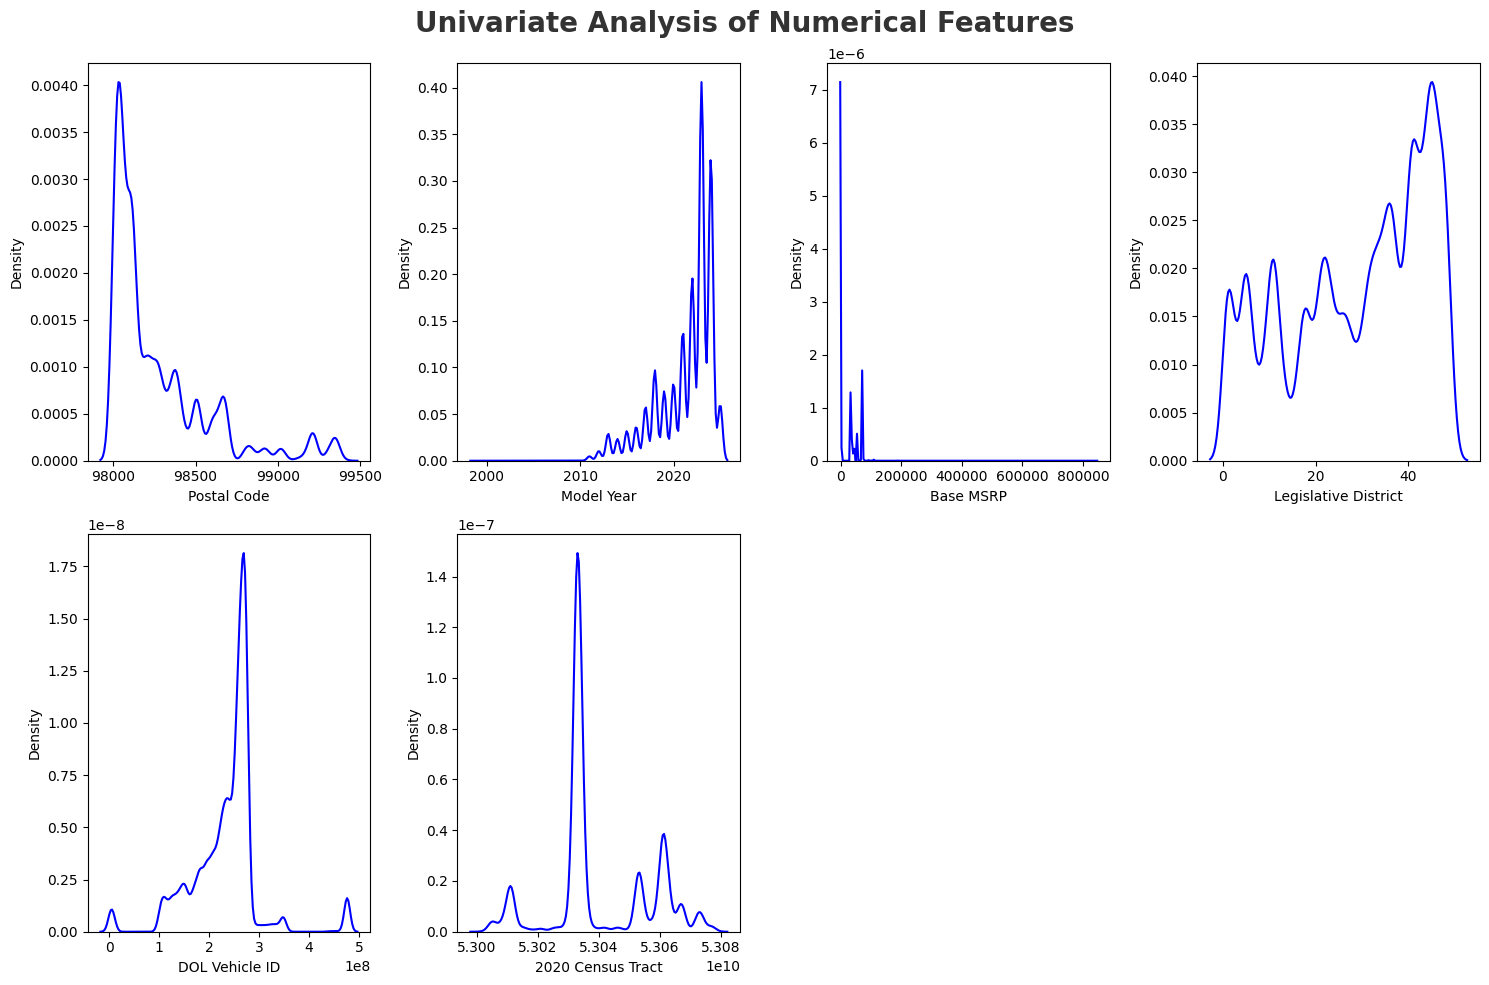

In [15]:
numeric_features.remove('Electric Range')
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8)

# Calculate the number of rows and columns required for subplots
n_features = len(numeric_features)
n_rows = (n_features + 3) // 4  # Adjust rows dynamically based on features

for i in range(n_features):
    plt.subplot(n_rows, 4, i + 1)  # Set grid layout dynamically
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

plt.show()

**Insights**
 - `Base MSRP` column has 0$ and dominate. Surely, it is placeholder.
 - About all the columns are not normally distributed data.

### Categorical Features

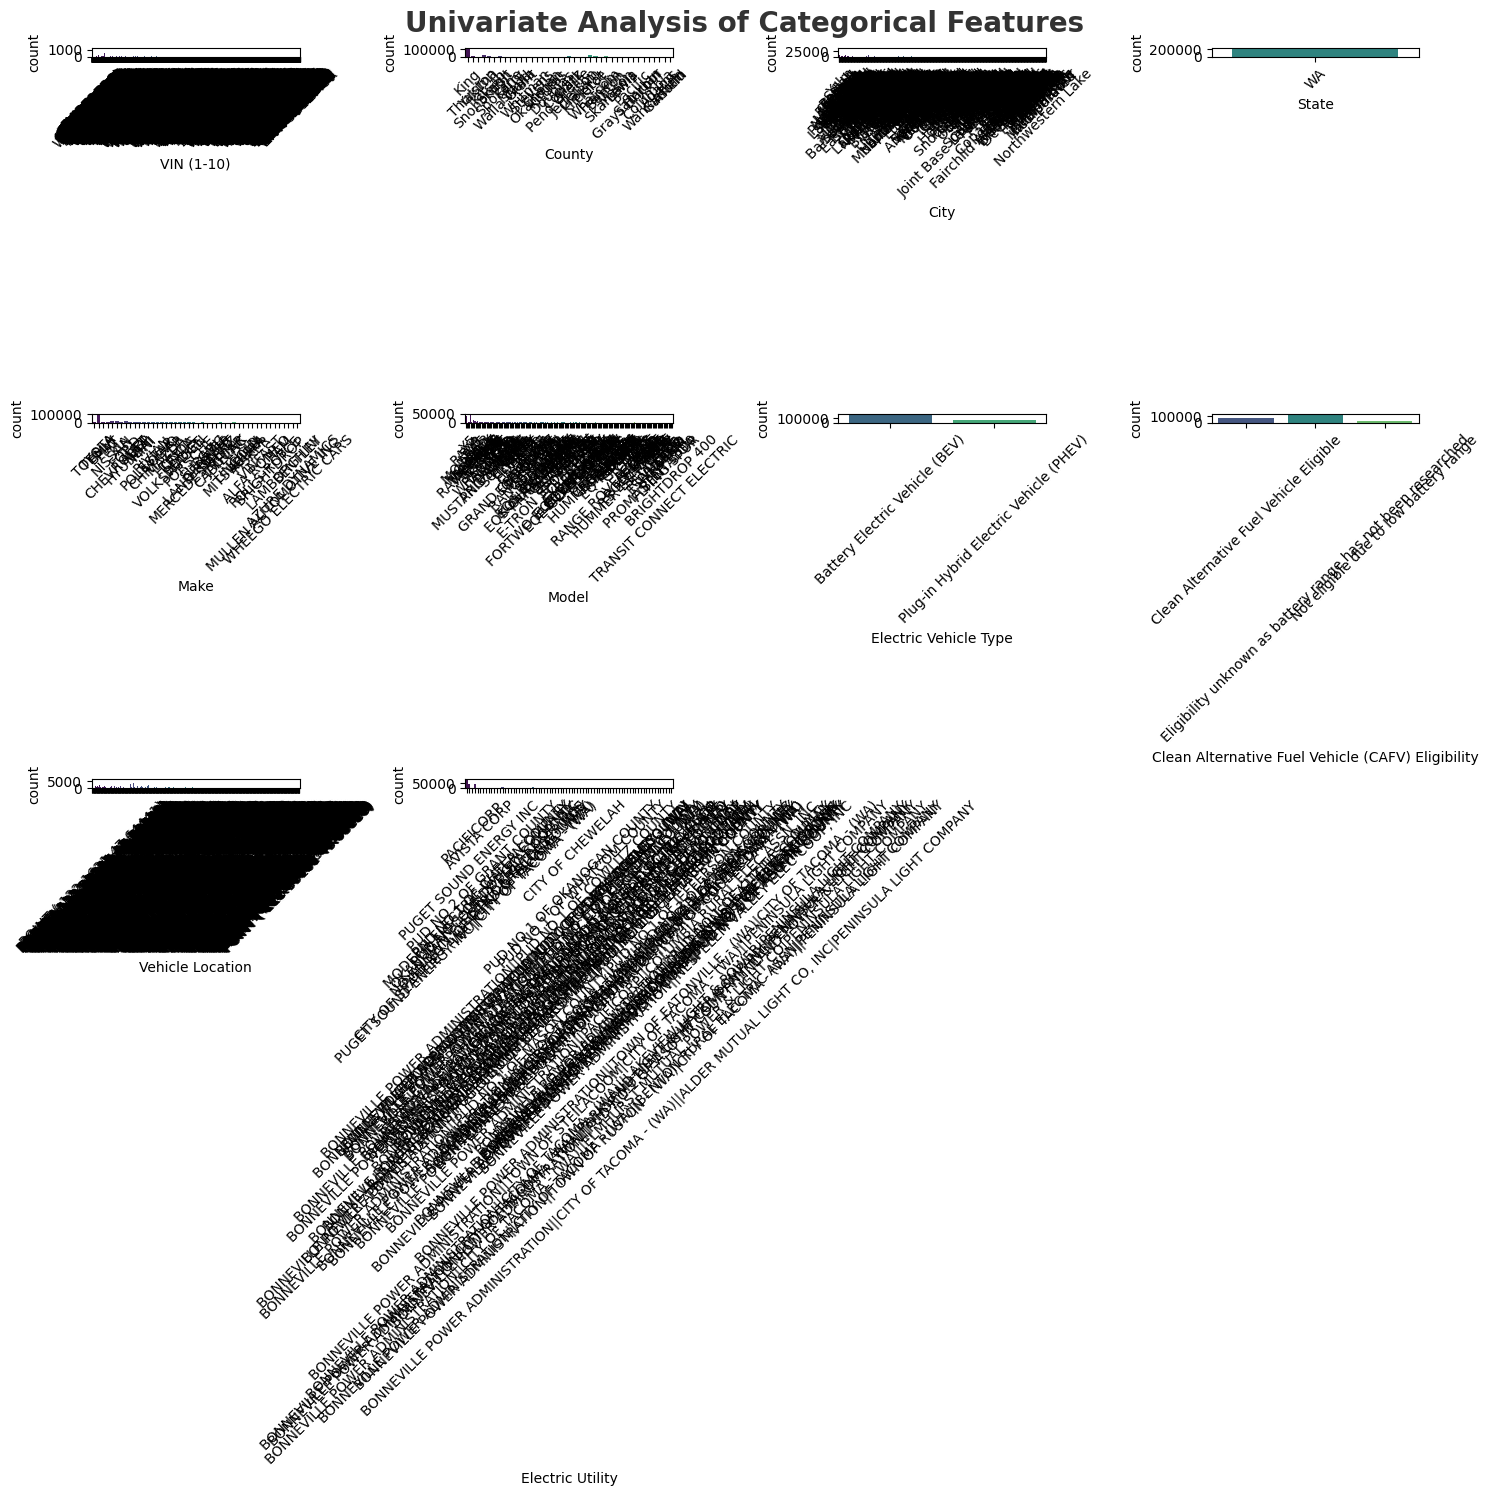

In [16]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8)

# Calculate the number of rows and columns required for subplots
n_features = len(categorical_features)
n_rows = (n_features + 3) // 4  # Adjust rows dynamically based on features

for i in range(n_features):
    plt.subplot(n_rows, 4, i + 1)  # Set grid layout dynamically
    sns.countplot(x=df[categorical_features[i]], palette='viridis')
    plt.xlabel(categorical_features[i], fontsize=10)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.
 - In rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [17]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['Model Year']

We have 5 continuous_features : ['Postal Code', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


**insight**
- `Model Year` column is discrete feature

# 6. Check Multicollinearity

To check multicollinearity among numerical and categorical features with respect to the target column (`Electric Range`), the approach varies slightly for numerical and categorical features:

**Approach:**

**1. Numerical Features:**

- Use the correlation matrix (e.g., Pearson correlation) to evaluate relationships.

**2. Categorical Features:**

- Convert categorical features to numerical (using one-hot encoding or label encoding) and calculate correlation or use feature importance techniques.

### Check Multicollinearity in Numerical features

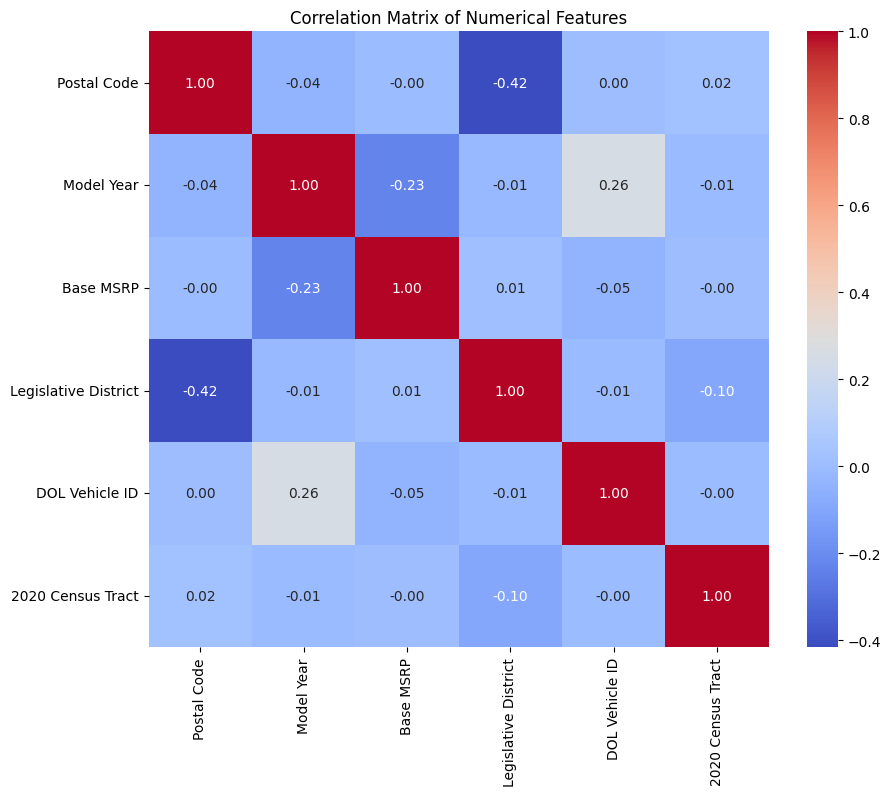


Correlation with Target Column (Electric Range):
Postal Code             0.010424
Model Year             -0.527790
Base MSRP               0.116651
Legislative District    0.015917
DOL Vehicle ID         -0.158179
2020 Census Tract      -0.006534
dtype: float64


In [18]:
# Numerical Features Correlation Matrix
def check_numerical_multicollinearity(data, numerical_features, target_column):
    correlation_matrix = data[numerical_features].corr()  # Correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # Correlation with Target Column
    correlations = data[numerical_features].corrwith(data[target_column])
    print("\nCorrelation with Target Column (Electric Range):")
    print(correlations)

# Check Numerical Multicollinearity
check_numerical_multicollinearity(df, numeric_features, target_column = 'Electric Range')

**insights**

Features to Consider Dropping:
Based on correlation values:
-  `Postal Code` column (0.010424): Very low correlation with the target.
-  `Legislative District` column (0.015917): Very low correlation with the target.
- `2020 Census Tract ` column (-0.006534): Essentially no correlation with the target.

These features have weak or no apparent linear relationship with the target variable (`Electric Range`) and are likely candidates for exclusion.

### Check Multicollinearity for Categorical features

In [19]:
# Categorical Features Correlation with Target Column
def check_categorical_multicollinearity(data, categorical_features, target_column):
    label_encoded_data = data[categorical_features].apply(LabelEncoder().fit_transform)
    mutual_info = mutual_info_regression(label_encoded_data, data[target_column])
    
    print("\nMutual Information Scores for Categorical Features:")
    for feature, score in zip(categorical_features, mutual_info):
        print(f"{feature}: {score:.4f}")

In [20]:
# Check Categorical Multicollinearity
check_categorical_multicollinearity(df, categorical_features, target_column = 'Electric Range')


Mutual Information Scores for Categorical Features:
VIN (1-10): 2.2680
County: 0.0181
City: 0.0536
State: 0.0014
Make: 1.0542
Model: 1.6457
Electric Vehicle Type: 0.5073
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0.8996
Vehicle Location: 0.0689
Electric Utility: 0.0222


**insights**

Based on the mutual information scores, indentify which categorical features have the strongest predictive relationship with the target column (`Electric Range`). Features with higher mutual information scores are more likely to contribute to your model's performance. 

Here’s how you might decide which columns to keep or drop:

**Features to Keep:**

These features have relatively higher mutual information scores and should be considered for the model:

- `VIN (1-10)`: 2.2699
- `Model`: 1.6458
- `Make`: 1.0595
- `Electric Vehicle Type`: 0.5084
- `Clean Alternative Fuel Vehicle (CAFV) Eligibility`: 0.9009

**Features to Consider Dropping:**

These features have very low mutual information scores and may have minimal contribution to the model:

- `County`: 0.0187
- `State`: 0.0019
- `City`: 0.0535
- `Electric Utility`: 0.0209
- `Vehicle Location`: 0.0711


### Drop the columns which are not correalted to the target column

In [39]:
# List of columns to drop
drop_columns = [
    "VIN (1-10)",
    "Postal Code", 
    "Legislative District",
    "DOL Vehicle ID", 
    "2020 Census Tract", 
    "County", 
    "State", 
    "City", 
    "Electric Utility", 
    "Vehicle Location"
]

# Drop the specified columns
data = df.drop(columns=drop_columns)

In [40]:
data.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0
1,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0
2,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0
3,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0
4,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0


In [41]:
# define numerical & categorical columns
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Model Year', 'Electric Range', 'Base MSRP']

We have 4 categorical features : ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']


In [42]:
continues_features=[feature for feature in numerical_features if len(data[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Model Year', 'Electric Range', 'Base MSRP']


In [43]:
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<=25]

continuous_features=[feature for feature in numerical_features if len(data[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['Model Year']

We have 2 continuous_features : ['Electric Range', 'Base MSRP']


In [44]:
data['Model Year'].value_counts()

Model Year
2023    59682
2024    47876
2022    28836
2021    20505
2018    14261
2020    12218
2019    10942
2025     8885
2017     8526
2016     5362
2015     4674
2013     4257
2014     3422
2012     1520
2011      692
2010       23
2008       22
2000        7
2002        2
1999        2
2003        1
Name: count, dtype: int64

# 7. Data Vizualization

In [45]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


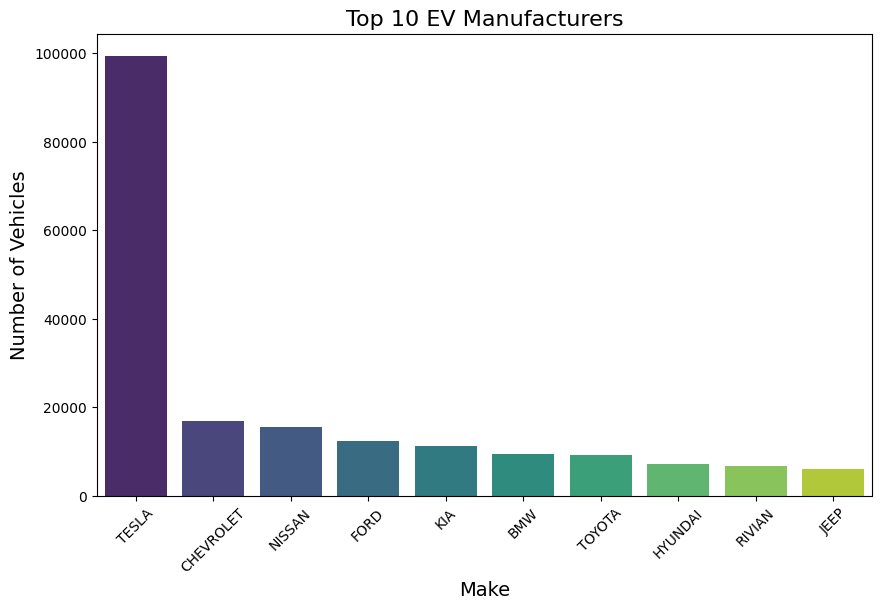

In [28]:
# Top 10 Makes
top_makes = df['Make'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title('Top 10 EV Manufacturers', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
plt.show()

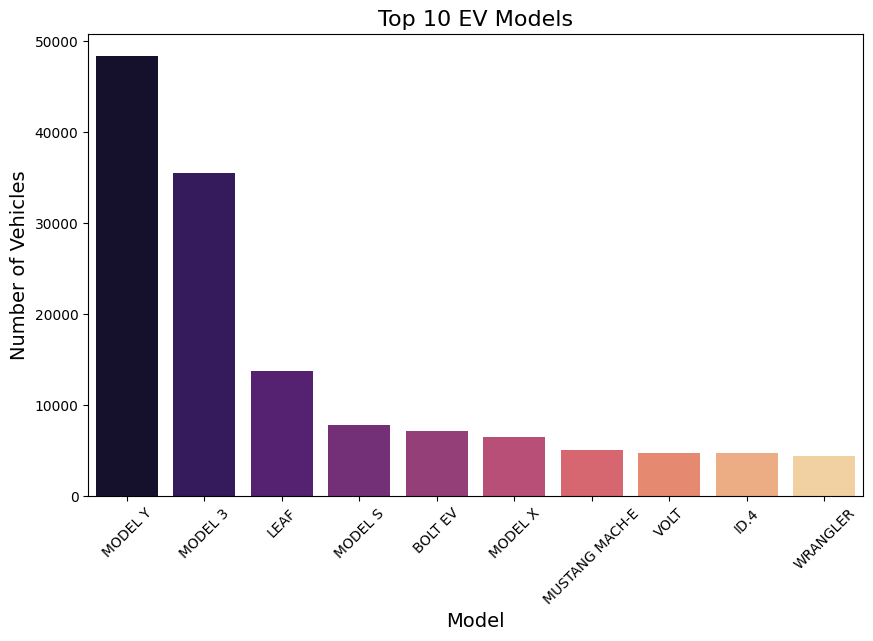

In [29]:
# Top 10 Models
top_models = df['Model'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.index, y=top_models.values, palette="magma")
plt.title('Top 10 EV Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
plt.show()

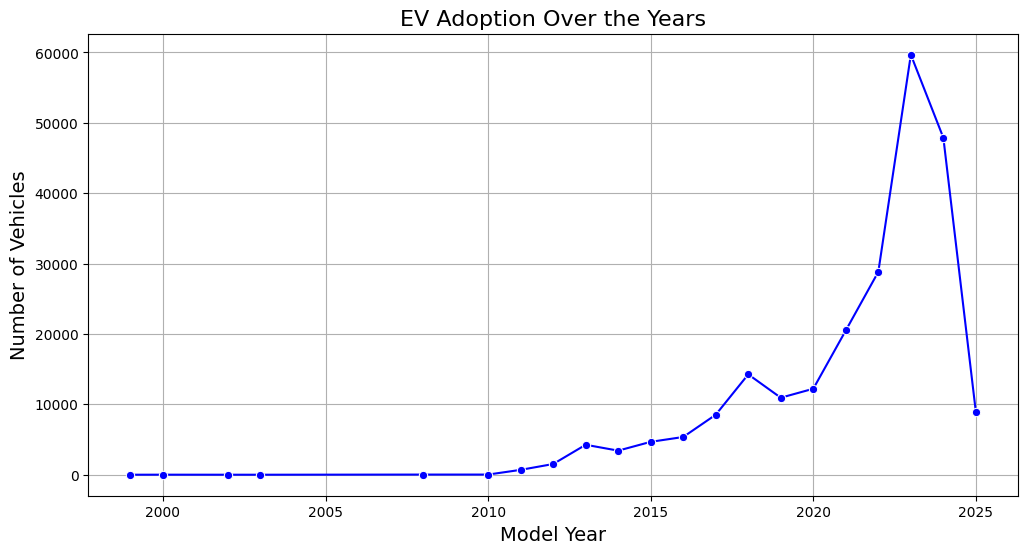

In [30]:
# EVs by Year
evs_by_year = df['Model Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=evs_by_year.index, y=evs_by_year.values, marker='o', color='b')
plt.title('EV Adoption Over the Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.grid(True)
plt.show()

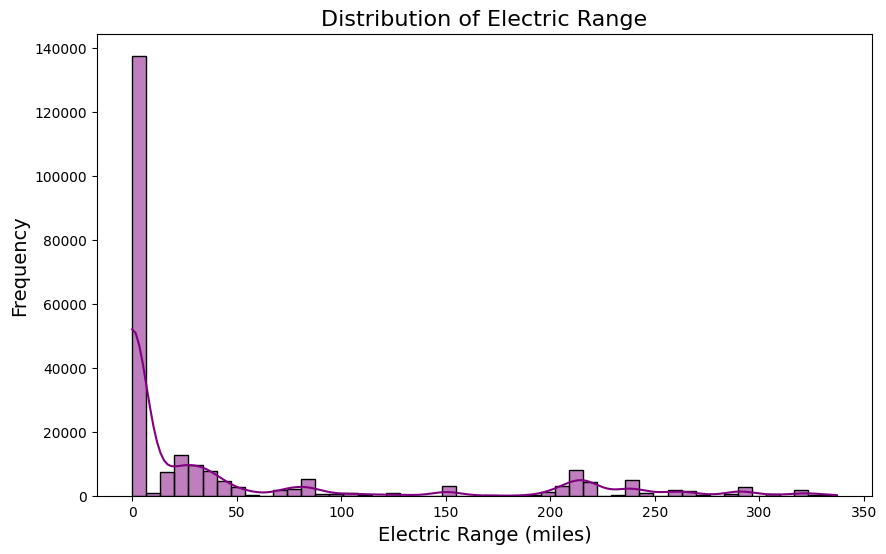

In [31]:
# Plot distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=50, kde=True, color='purple')
plt.title('Distribution of Electric Range', fontsize=16)
plt.xlabel('Electric Range (miles)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

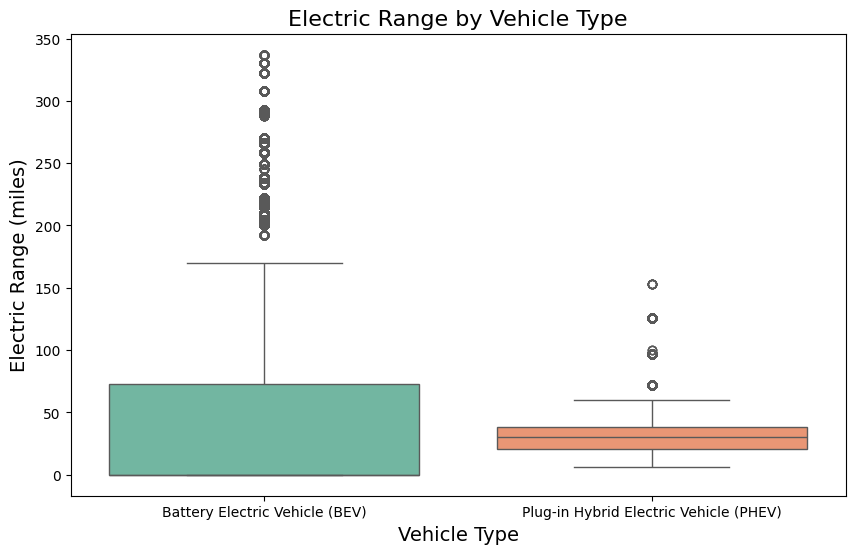

In [32]:
# Boxplot of Electric Range by Vehicle Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette="Set2")
plt.title('Electric Range by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)
plt.show()

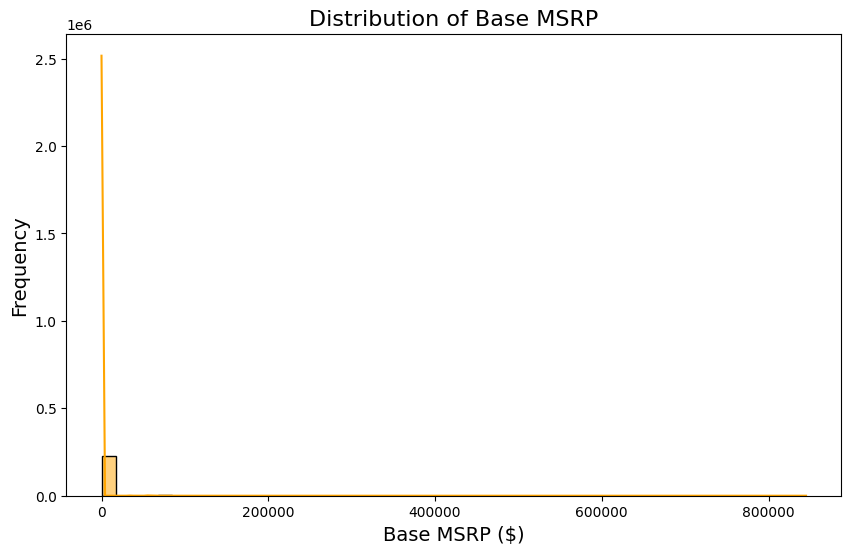

In [34]:
# Plot distribution of Base MSRP
plt.figure(figsize=(10, 6))
sns.histplot(df['Base MSRP'], bins=50, kde=True, color='orange')
plt.title('Distribution of Base MSRP', fontsize=16)
plt.xlabel('Base MSRP ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

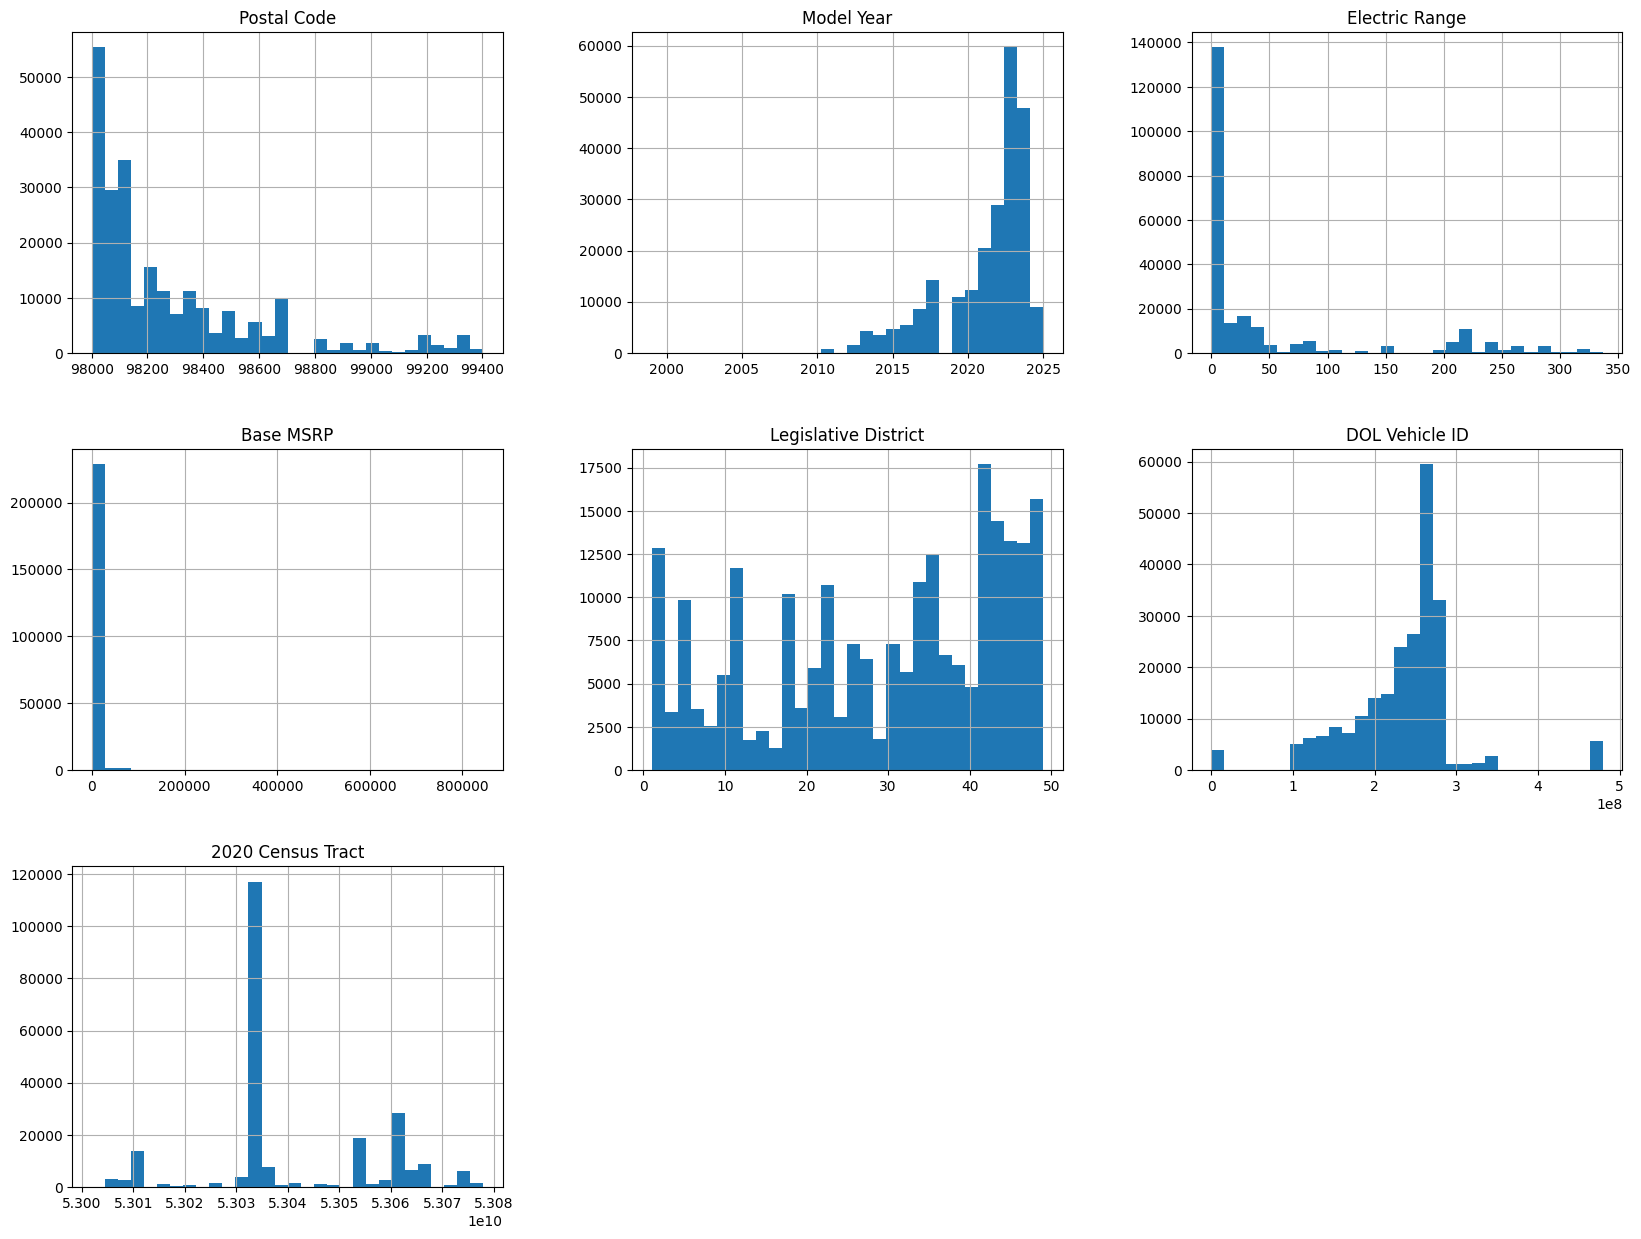

In [35]:
# Plot histograms for each feature
df.hist(bins=30, figsize=(20, 15))
plt.show()

# 8. Detect Outliers

In [36]:
# Detect outliers in the target column 'Electric Range'
def detect_target_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows with outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in '{column}': {len(outliers)}")

    return outliers

# Detect and print outliers in the target column
outliers_electric_range = detect_target_outliers(data, 'Electric Range')
print(outliers_electric_range)

Number of outliers in 'Electric Range': 38536
        VIN (1-10)  Model Year    Make    Model  \
0       2T3YL4DV0E        2014  TOYOTA     RAV4   
1       5YJ3E1EB6K        2019   TESLA  MODEL 3   
6       5YJ3E1EA4J        2018   TESLA  MODEL 3   
7       5YJ3E1EA3K        2019   TESLA  MODEL 3   
9       5YJSA1S25F        2015   TESLA  MODEL S   
...            ...         ...     ...      ...   
232191  5YJ3E1EBXK        2019   TESLA  MODEL 3   
232194  KNDCE3LG8K        2019     KIA     NIRO   
232207  5YJXCAE43G        2016   TESLA  MODEL X   
232214  5YJ3E1EA5L        2020   TESLA  MODEL 3   
232225  5YJ3E1EA3K        2019   TESLA  MODEL 3   

                 Electric Vehicle Type  \
0       Battery Electric Vehicle (BEV)   
1       Battery Electric Vehicle (BEV)   
6       Battery Electric Vehicle (BEV)   
7       Battery Electric Vehicle (BEV)   
9       Battery Electric Vehicle (BEV)   
...                                ...   
232191  Battery Electric Vehicle (BEV)   
23219

In [37]:
outliers_electric_range

,VIN (1-10),Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID
0,2T3YL4DV0E,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,186450183
1,5YJ3E1EB6K,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,478093654
6,5YJ3E1EA4J,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,270125096
7,5YJ3E1EA3K,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,238776492
9,5YJSA1S25F,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,161974606
...,...,...,...,...,...,...,...,...,...
232191,5YJ3E1EBXK,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,476719316
232194,KNDCE3LG8K,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,478713336
232207,5YJXCAE43G,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,202661420
232214,5YJ3E1EA5L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,230922520


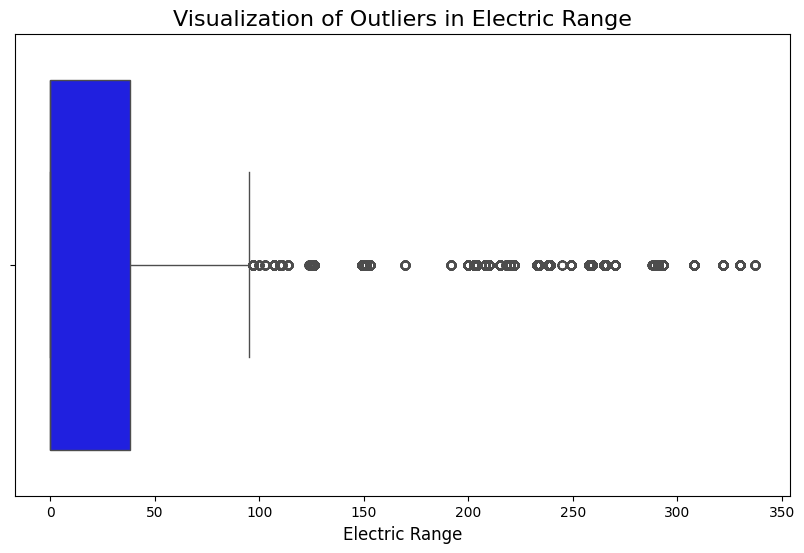

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Electric Range'], color='blue')
plt.title('Visualization of Outliers in Electric Range', fontsize=16)
plt.xlabel('Electric Range', fontsize=12)
plt.show()

In [38]:
percentage_of_outliers = len(outliers_electric_range) / len(data) * 100
print(f"Percentage of outliers in 'Electric Range': {percentage_of_outliers:.2f}%")

Percentage of outliers in 'Electric Range': 16.63%


**Insights**  
- The percentage of outliers in 'Electric Range' is **16.63%**.  
- Since this represents a large portion of the data, I have decided to remove the outliers from the dataset. However, I will apply a **scaling technique** before training the ML model to ensure proper handling of the data distribution.
